# Waze - Statistical Review

This work focuses on applying statistical analysis to interpret data, covering key concepts such as descriptive statistics and hypothesis testing. The analysis involves examining the provided data through A/B testing and hypothesis testing. The objective is to utilize descriptive statistics and hypothesis testing to explore whether a link exists between the average number of rides taken by users of different device types, specifically Android and iPhone users.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
# reading the data
df = pd.read_csv("waze_dataset.csv")
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [8]:
# calculating the mean number of drives for each device type
drives_by_device = df.groupby("device").mean(numeric_only=True)[["drives"]]
drives_by_device.head()

,drives
device,
Android,66.231838
iPhone,67.859078


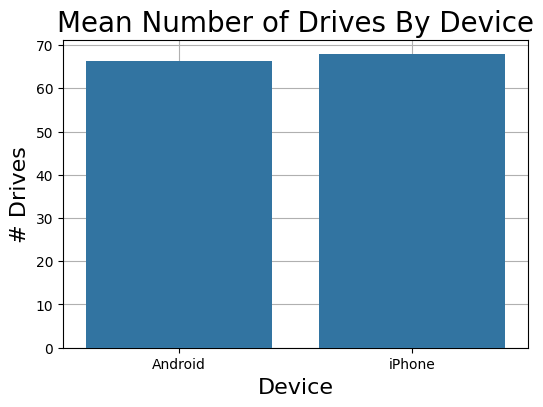

In [9]:
# creating bar plot for mean number of drives by device
plt.figure(figsize=(6,4))
ax = sns.barplot(x=drives_by_device.index,
                 y=drives_by_device["drives"],
                 zorder=3)
plt.title("Mean Number of Drives By Device", fontsize=20)
plt.ylabel("# Drives", fontsize=16)
plt.xlabel("Device", fontsize=16)
plt.grid(zorder=0)

Descriptive statistics allow for a quick analysis and understanding of large datasets. They enable a straightforward comparison of the average number of drives between iPhone and Android users. Findings suggest that iPhone users have a higher average number of drives compared to Android users. However, this difference might be due to random variations in the data rather than an actual difference in driving patterns. To determine if this difference is statistically significant, a hypothesis test is required.

* Null Hypothesis (H₀): There is no difference in the average number of drives between iPhone users and Android users.
* Alternative Hypothesis (H₁): There is a difference in the average number of drives between iPhone users and Android users.


In [10]:
# statistical significance
threshold = 0.05

In [11]:
# hypothesis testing
iPhone = df[df["device"] == "iPhone"]["drives"]
Android = df[df["device"] == "Android"]["drives"]
res = stats.ttest_ind(a=iPhone, b=Android, equal_var=False)
p = res[1]
print(res)
print("p =", p)

TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)
p = 0.143351972680206


In [12]:
if p < threshold:
    print("We reject the null hypothesis.")
else:
    print("We do not reject the null hypothesis.")

We do not reject the null hypothesis.


The hypothesis test indicates that the difference in the number of drives between iPhone and Android users is not statistically significant. In other words, iPhone and Android users have similar driving behaviors in terms of the average number of drives. A suggested next step is to explore other variables that may influence driving behavior and conduct additional hypothesis tests. Moreover, temporary adjustments in marketing or user interface could provide further data to understand user churn.